# Notes: [Models of Hebbian learning](https://neuronaldynamics.epfl.ch/online/Ch19.S2.html)

## A Mathematical Formulation of Hebb’s Rule

In order to find a mathematically formulated learning rule based on **Hebb’s postulate** we focus on a single synapse with efficacy $w_{ij}$ that transmits signals from a **presynaptic neuron** $j$ to a **postsynaptic neuron** $i$. 

**mean firing rates** $\nu$ the activity of the **presynaptic neuron** is denoted by $\nu_j$ and that of the **postsynaptic neuron by $\nu_i$.

There are two aspects in **Hebb’s postulate** that are particularly important; these are ***locality*** and ___joint activity___ . 


***Locality*** means that the change of the **synaptic efficacy** can only depend on local variables, i.e., on information that is available at the site of the synapse, such as pre- and postsynaptic firing rate, and the actual value of the **synaptic efficacy**, but not on the activity of other neurons.


$$\frac{\mathrm{d}}{\mathrm{d}t}w_{ij}=F(w_{ij};\nu_i,\nu_j)$$


$\mathrm{d}w_{ij}/\mathrm{d}t$ is **the rate of change of the synaptic coupling strength** and $F$ is a so far undetermined function.

 in standard rate models this is not necessary adding input potential $h_i$,since the input potential $h_i$ is uniquely determined by the postsynaptic firing rate, $\nu_i=g(h_i)$ , with a monotone gain function $g$ .
 
 
If $F$ is sufficiently well-behaved, we can expand $F$ in a Taylor series about $\nu_i=\nu_j=0$ ,

$$\frac{\mathrm{d}}{\mathrm{d}t}w_{ij}=c_0(w_{ij})+c_1^{pre}(w_{ij})\nu_j+c_1^{post}(w_{ij})\nu_i+c_2^{pre}(w_{ij})\nu_j^2+c_2^{post}(w_{ij})\nu_i^2+c_1^{corr}(w_{ij})\nu_i \nu_j+\mathscr{O}(\nu^3)$$

### Example: Hebb rules, saturation, and LTD

prototype of Hebbian learning,

$$\frac{\mathrm{d}}{\mathrm{d}t}w_{ij}=c_{11}^{corr}\nu_i \nu_j$$

We note in passing that a learning rule with $c_{11}^{corr}<0$ is usually called **anti-Hebbian** because ___it weakens the synapse if pre- and postsynaptic neuron are active simultaneously___; a behavior that is just contrary to that postulated by Hebb.

### Example: Oja's rule

set $c_2^{post}=-\gamma w_{ij}$ and $c_{11}^{corr}=\gamma>0$

The learning rule
$$\frac{\mathrm{d}}{\mathrm{d}t}w_{ij}=\gamma\left[\nu_i \nu_j-w_{ij}\nu_i^2\right]$$

is called **Oja's rule**. 

Under some general conditions **Oja’s rule** converges asymptotically to synaptic weights that are normalized to $\sum_j w_{ij}^2=1$ while keeping the essential __Hebbian properties__ of the standard rule of __prototype of Hebbian learning__

# Codes:[Oja’s hebbian learning rule](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/ojas-rule.html)

In [1]:
import neurodynex.ojas_rule.oja as oja

In [2]:
cloud = oja.make_cloud()  # generate data points
wcourse = oja.learn(cloud)  # learn weights and return timecourse

The final weight vector w is: (0.5243356201948501,0.8531883125782815)


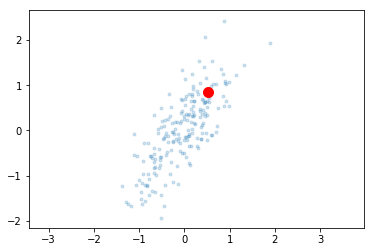

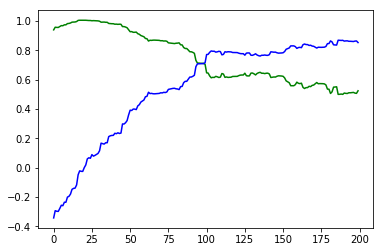

In [4]:
%matplotlib inline
import neurodynex.ojas_rule.oja as oja
import matplotlib.pyplot as plt

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

## Exercise: getting started

### Question: The norm of the weights

The final weight vector w is: (0.43968220210053166,0.9258459503686248)


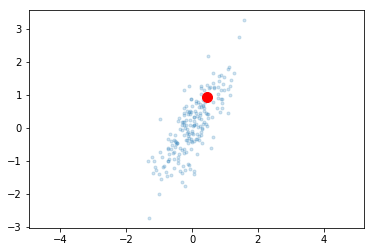

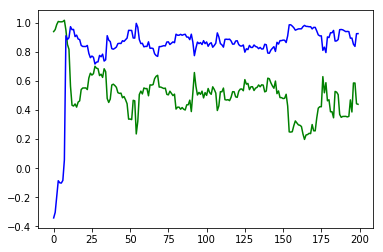

In [139]:
# object 1
%matplotlib inline
import neurodynex.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

In [146]:
def square_norm(wcourse):
    return np.sign(wcourse)*np.sqrt(((wcourse**2).T/(wcourse**2).sum(axis=1))).T


In [147]:
wcourse_normed=square_norm(wcoruse)

The final weight vector w is: (0.4289814870868563,0.9033132810585425)


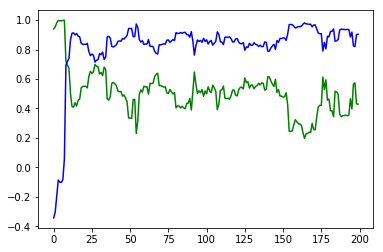

In [150]:
# object 2
wcourse_normed=np.sign(wcourse)*np.sqrt(((wcourse**2).T/(wcourse**2).sum(axis=1))).T
plt.figure()
plt.plot(wcourse_normed[:, 0], "g")
plt.plot(wcourse_normed[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse_normed[-1,0],wcourse_normed[-1,1]))

## Exercise: Circular data

The final weight vector w is: (0.445221212086883,-0.9436496458919181)


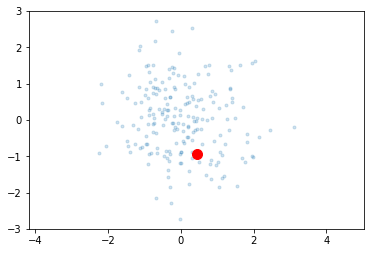

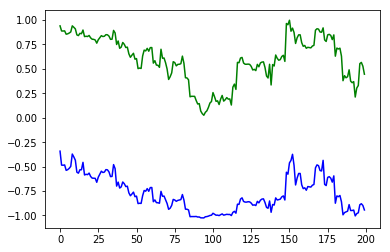

In [45]:
%matplotlib inline
import neurodynex.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=1, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.1)

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

They cannot converge to each other ?

## Exercise: What is the neuron leaning?

The final weight vector w is: (0.48706348039036024,0.8747189896031148)


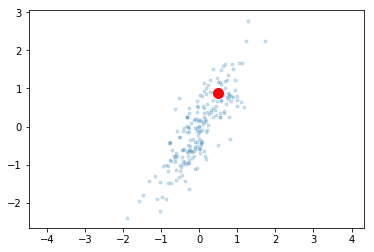

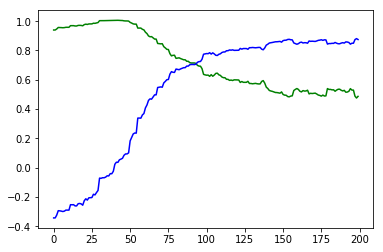

In [52]:
# object 1
%matplotlib inline
import neurodynex.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=0.3, angle=60)# elongated elliptic data cloud
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

In [97]:
%pfile oja.learn

In [48]:
# object 2

it converges faster?

In [104]:
# object 3
y=(wcourse*cloud).sum(axis=1)

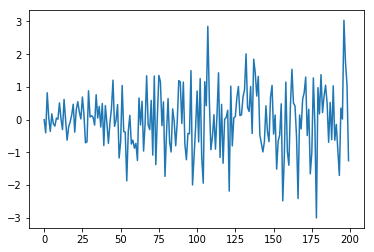

In [105]:
plt.plot(y)

In [157]:
# object 4
cloud_normed=square_norm(cloud)
#wcourse_normed=square_norm(wcourse)
(wcourse[-1]*cloud_normed).sum(axis=1).max()

1.0249387476128888

In [158]:
(wcourse[-1]*cloud_normed).sum(axis=1).min()

-1.024944427518153

## Exercise: Non-centered data

The final weight vector w is: (0.5165492706037669,0.8578766820906827)


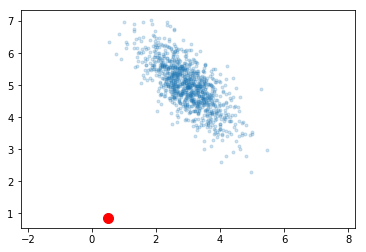

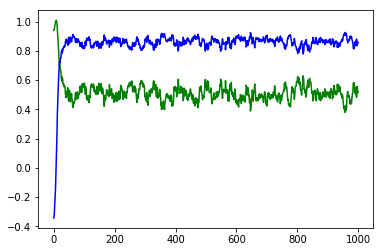

In [167]:
cloud = (3,5) + oja.make_cloud(n=1000, ratio=.4, angle=-45)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.005)#make eta smaller

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

it cannot converge if eta is as large as before. You just make eta smaller.

## Bonus: 3 D

In [165]:
# ** TODO **